In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree 
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
company_data = pd.read_csv("Company_Data.csv")
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data.shape

(400, 11)

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


No null entries/values in the dataset.

Droping the Columns:-    

In [6]:
cols_to_drop = ['Age','Education','Price']
company_data = company_data.drop(cols_to_drop, axis=1)

In [7]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc,Urban,US
0,9.50,138,73,11,276,Bad,Yes,Yes
1,11.22,111,48,16,260,Good,Yes,Yes
2,10.06,113,35,10,269,Medium,Yes,Yes
3,7.40,117,100,4,466,Medium,Yes,Yes
4,4.15,141,64,3,340,Bad,Yes,No


Plotting the heatmap to show the higher values:-

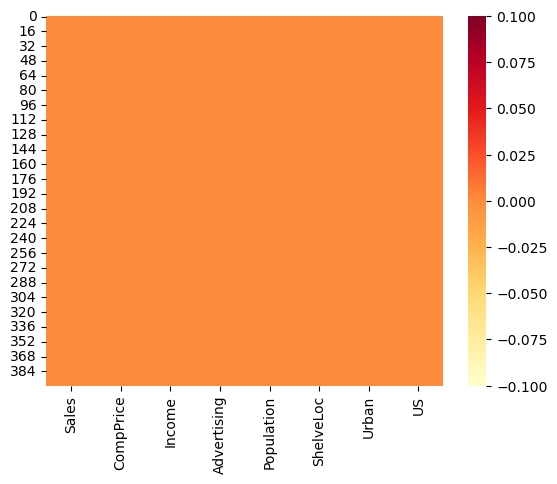

In [8]:
sns.heatmap(company_data.isnull(),cmap="YlOrRd")
plt.show()

In [9]:
company_data=company_data.dropna()

In [10]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc,Urban,US
0,9.50,138,73,11,276,Bad,Yes,Yes
1,11.22,111,48,16,260,Good,Yes,Yes
2,10.06,113,35,10,269,Medium,Yes,Yes
3,7.40,117,100,4,466,Medium,Yes,Yes
4,4.15,141,64,3,340,Bad,Yes,No


In [11]:
le=LabelEncoder()

In [12]:
company_data['US']=le.fit_transform(company_data['US'])

In [13]:
company_data

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc,Urban,US
0,9.50,138,73,11,276,Bad,Yes,1
1,11.22,111,48,16,260,Good,Yes,1
2,10.06,113,35,10,269,Medium,Yes,1
3,7.40,117,100,4,466,Medium,Yes,1
4,4.15,141,64,3,340,Bad,Yes,0
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,Good,Yes,1
396,6.14,139,23,3,37,Medium,No,1
397,7.41,162,26,12,368,Medium,Yes,1
398,5.94,100,79,7,284,Bad,Yes,1


In [14]:
company_data1=pd.get_dummies(company_data,columns=['ShelveLoc','Urban'],prefix_sep='')

In [15]:
company_data1.head()

,Sales,CompPrice,Income,Advertising,Population,US,ShelveLocBad,ShelveLocGood,ShelveLocMedium,UrbanNo,UrbanYes
0,9.50,138,73,11,276,1,1,0,0,0,1
1,11.22,111,48,16,260,1,0,1,0,0,1
2,10.06,113,35,10,269,1,0,0,1,0,1
3,7.40,117,100,4,466,1,0,0,1,0,1
4,4.15,141,64,3,340,0,1,0,0,0,1


Data Separated the x and y:-

In [16]:
x=company_data1.drop(['US'],axis=1)
y=company_data1['US']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

In [18]:
X_train

,Sales,CompPrice,Income,Advertising,Population,ShelveLocBad,ShelveLocGood,ShelveLocMedium,UrbanNo,UrbanYes
250,9.16,137,105,10,435,0,1,0,0,1
63,8.47,119,88,10,170,0,0,1,0,1
312,6.80,137,117,5,337,1,0,0,0,1
159,9.32,119,60,0,372,1,0,0,1,0
283,5.36,135,110,0,112,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
323,10.36,107,105,18,428,0,0,1,0,1
192,7.56,108,26,0,408,0,0,1,1,0
117,8.80,145,53,0,507,0,0,1,0,1
47,4.38,126,98,0,173,1,0,0,0,1


In [19]:
y_train

250    1
63     1
312    1
159    0
283    0
      ..
323    1
192    0
117    0
47     0
172    1
Name: US, Length: 300, dtype: int32

In [20]:
company_data.shape

(400, 8)

Model Creation:-

In [21]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

Model Validation:- Confusion Matrix

In [22]:
y_pred = model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[23,  8],
       [ 5, 64]], dtype=int64)

In [23]:
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.87

In [24]:
y_pred1 = model.predict(X_train)
train_acc = accuracy_score(y_train,y_pred1)
train_acc

1.0

Building the Decision Tree:-

In [25]:
company_clf = tree.DecisionTreeClassifier(max_depth=5)                                      #buliding
company_clf.fit(X_train,y_train)                                                                                #Training

company_clf.score(X_test,y_test)                                                                            # predicting

y_pred =company_clf.predict(X_test)
company_clf.score(X_test,y_test)

0.86

In [26]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [27]:
company_clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=5)>

Hyperparameter Tuning:- Grid Search

In [28]:
model2 = RandomForestClassifier()

fold = KFold(n_splits=6)

param = {"n_estimators":[20,40,60,80,100],"criterion":["gini","entropy"],"max_depth":[None,6,8,10]}

grid = GridSearchCV(estimator=model2,param_grid=param,cv=fold)

In [29]:
grid_result = grid.fit(x,y)

In [30]:
grid_result.best_score_

0.9050203527815467

In [31]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 40}

Final Model:-

In [32]:
final_model = RandomForestClassifier(criterion="entropy",max_depth=6,n_estimators=40)

In [33]:
final_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=40)

In [34]:
y_pred = final_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[23,  8],
       [ 4, 65]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.88

Classification Report:-

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.89      0.94      0.92        69

    accuracy                           0.88       100
   macro avg       0.87      0.84      0.85       100
weighted avg       0.88      0.88      0.88       100

